## Supermarket chain analysis
Given supermarket distances, price, and purchases, try to find actionable insights for 5 stores.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. import data

In [74]:
data = pd.read_csv('supermarket_data_aggr.csv')
data = data.dropna()
num_shop = 5

Examin per store information, including customer-store distance, nubmer of product purchased, nubmer of unique product purchased, amount purchased, average purchased amount, average price per item purchased. 

In [60]:
data1=data[data.amount_purchased_shop_1!=0][['customer_id','distance_shop_1','products_purchased_shop_1','unique_products_purchased_shop_1','amount_purchased_shop_1','avg_purchase_shop_1','avg_price_shop_1']]
data2=data[data.amount_purchased_shop_2!=0][['customer_id','distance_shop_2','products_purchased_shop_2','unique_products_purchased_shop_2','amount_purchased_shop_2','avg_purchase_shop_2','avg_price_shop_2']]
data3=data[data.amount_purchased_shop_3!=0][['customer_id','distance_shop_3','products_purchased_shop_3','unique_products_purchased_shop_3','amount_purchased_shop_3','avg_purchase_shop_3','avg_price_shop_3']]
data4=data[data.amount_purchased_shop_4!=0][['customer_id','distance_shop_4','products_purchased_shop_4','unique_products_purchased_shop_4','amount_purchased_shop_4','avg_purchase_shop_4','avg_price_shop_4']]
data5=data[data.amount_purchased_shop_5!=0][['customer_id','distance_shop_5','products_purchased_shop_5','unique_products_purchased_shop_5','amount_purchased_shop_5','avg_purchase_shop_5','avg_price_shop_5']]

In [61]:
data1=data1.set_index('customer_id')
data2=data2.set_index('customer_id')
data3=data3.set_index('customer_id')
data4=data4.set_index('customer_id')
data5=data5.set_index('customer_id')

## 2. Descriptive statistics
Look at total customer transaction, average purchased amount, customer nubmer per store

In [62]:
summary = {"total": [sum(data1.amount_purchased_shop_1),sum(data2.amount_purchased_shop_2),\
                     sum(data3.amount_purchased_shop_3),sum(data4.amount_purchased_shop_4),\
                     sum(data5.amount_purchased_shop_5)], \
           "customer_num": [data1.shape[0],data2.shape[0],data3.shape[0],\
                            data4.shape[0],data5.shape[0]]}
summary= pd.DataFrame(summary,index=[1,2,3,4,5])

In [63]:
summary['average'] = summary['total']/summary['customer_num']

In [64]:
summary

,customer_num,total,average
1,55552,1.394713e+08,2510.644413
2,44794,8.290017e+07,1850.697993
3,20503,1.830655e+07,892.871845
4,10400,6.659154e+06,640.303275
5,12423,8.338360e+06,671.203435


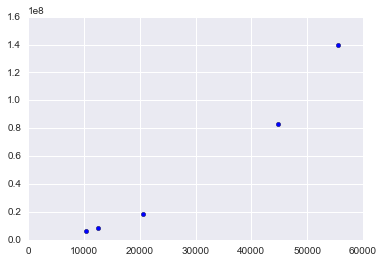

In [65]:
plt.scatter(summary.customer_num, summary.total)

Exmaine feature correlation. I found that 
1. The number of purchased product is highly correlated with the number of unique purchased product. I consider to only use the number of unique purchased products for following analysis. 
2. The two average values are highly correlated also, which is expected. I consider to use the averaged purchased products for following analysis.
3. The amount purchased is highly correlated with the number of purchased product for all shops. 
4. The averaged purchased products(amount/#unique products) is correlated with amount purchased in shop 3 and 5, less in shop 2 and 4, and least in shop 1.
5. Distance seems to have the least correlation in shop 1, and small effect in the rest shops. 

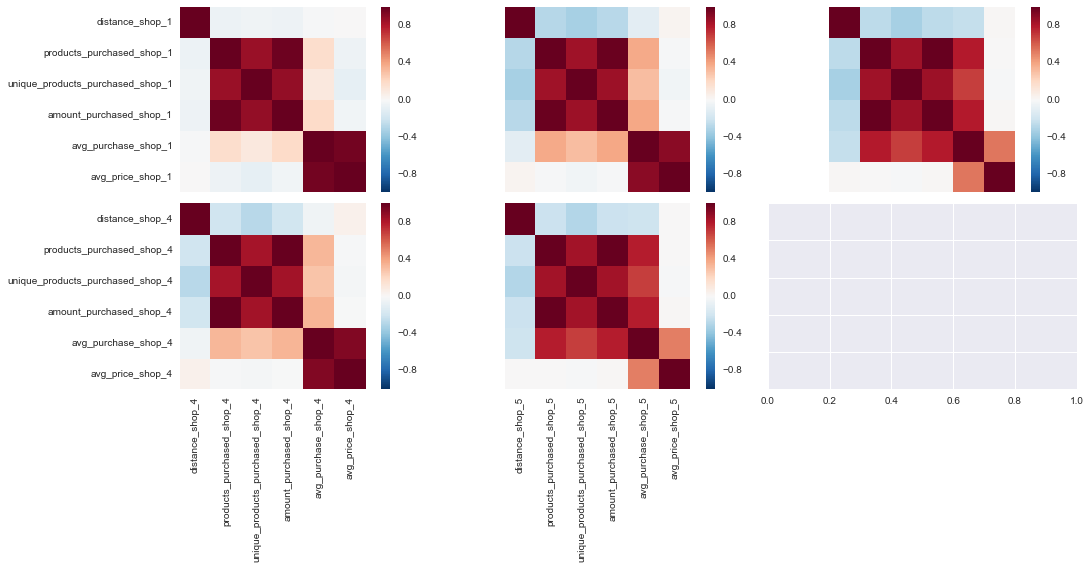

In [66]:
fig,ax = plt.subplots(2,3,figsize=(16,8))
sns.heatmap(data1.corr(),square=True,ax=ax[0,0])
sns.heatmap(data2.corr(),square=True,ax=ax[0,1])
sns.heatmap(data3.corr(),square=True,ax=ax[0,2])
sns.heatmap(data4.corr(),square=True,ax=ax[1,0])
sns.heatmap(data5.corr(),square=True,ax=ax[1,1])
plt.setp([a.get_xticklabels() for a in ax[0,:]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:,1]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:,2]], visible=False)
plt.tight_layout()
plt.show()

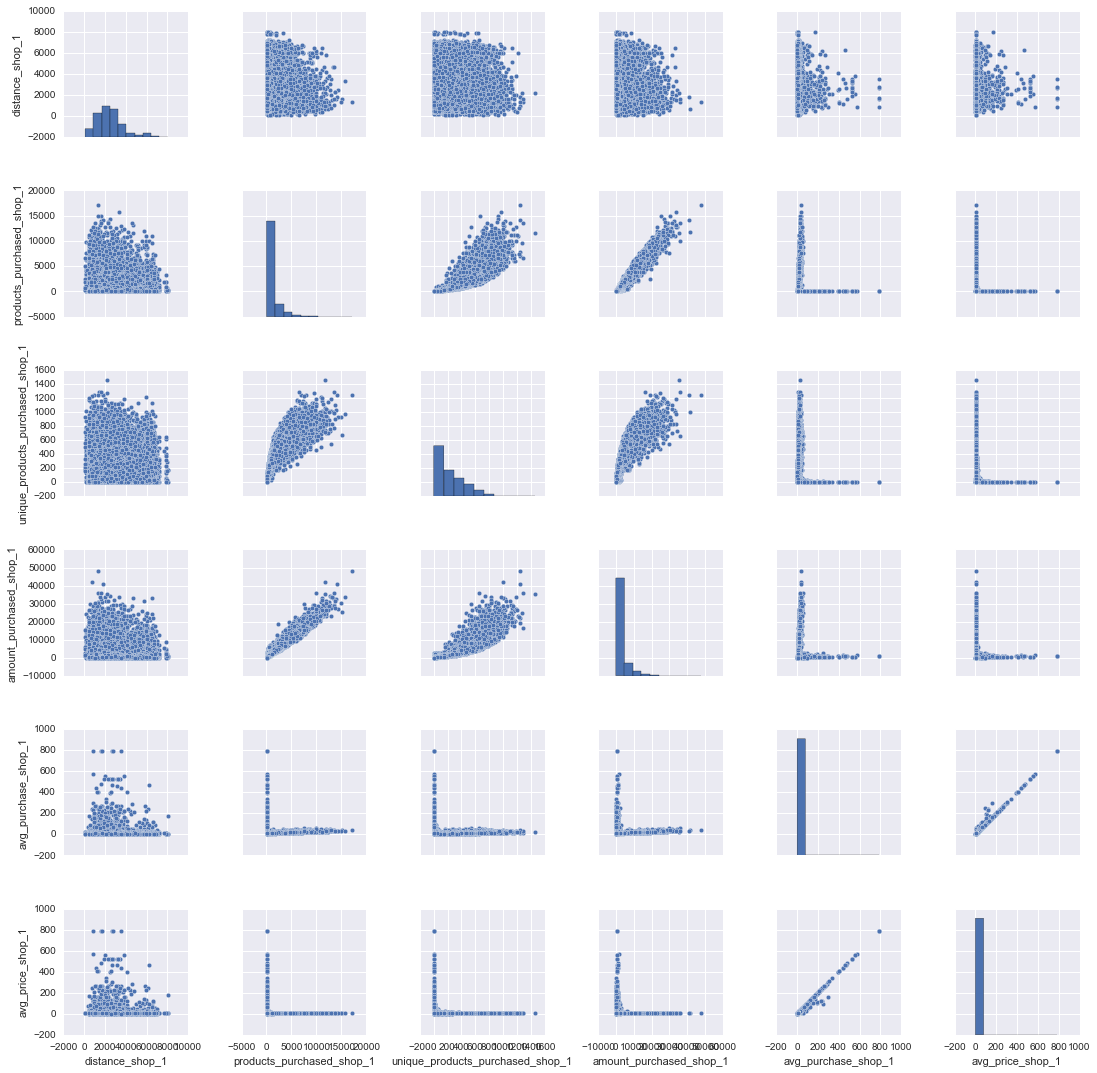

In [68]:
sns.pairplot(data1)
plt.show()

## 3. Prepare for train and test
This is performed at shop level. Features are consolidated after removing highly correlated ones.

In [71]:
data1_X = data1[['distance_shop_1','unique_products_purchased_shop_1','avg_purchase_shop_1']]
data1_Y = data1[['amount_purchased_shop_1']]
data2_X = data2[['distance_shop_2','unique_products_purchased_shop_2','avg_purchase_shop_2']]
data2_Y = data2[['amount_purchased_shop_2']]
data3_X = data3[['distance_shop_3','unique_products_purchased_shop_3','avg_purchase_shop_3']]
data3_Y = data3[['amount_purchased_shop_3']]
data4_X = data4[['distance_shop_4','unique_products_purchased_shop_4','avg_purchase_shop_4']]
data4_Y = data4[['amount_purchased_shop_4']]
data5_X = data5[['distance_shop_5','unique_products_purchased_shop_5','avg_purchase_shop_5']]
data5_Y = data5[['amount_purchased_shop_5']]

## 4. Model
I treat it as a regression problem with the amount purchased as the target. I will use random forest regressor to predict the purchase amount. Only shop 1 result is shown, but similar results can be seem for all shops.

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [88]:
model = RandomForestRegressor()
solution_1 = model.fit(data1_X,data1_Y)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [89]:
feature_importance_1 = pd.DataFrame({'feature': data1_X.columns,\
                                     'importance':solution_1.feature_importances_})
feature_importance_1.sort_values(by='importance', ascending=False,inplace=True)

In [90]:
feature_importance_1

,feature,importance
1,unique_products_purchased_shop_1,0.753993
2,avg_purchase_shop_1,0.245753
0,distance_shop_1,0.000254


In [91]:
score = cross_val_score(model,data1_X, data1_Y,cv=3)

//anaconda/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [96]:
print score

[ 0.99893821  0.99891178  0.9990763 ]


## 5. Conclusion
Using a regression model, I found that the number of unique purchased products is a major predictor for purchased amount. The recommended action would be introducing products categories, so that customers can have more items to choose from.